In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

import json
import git
from collections import defaultdict
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
path = Path(".")
if not path.joinpath("cf-action-counter-db").is_dir():
    !git clone https://github.com/regro/cf-action-counter-db

Cloning into 'cf-action-counter-db'...
remote: Enumerating objects: 192, done.
remote: Counting objects: 100% (192/192), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 74090 (delta 94), reused 145 (delta 48), pack-reused 73898
Receiving objects: 100% (74090/74090), 16.35 MiB | 11.04 MiB/s, done.
Resolving deltas: 100% (37163/37163), done.


In [4]:
keys = ['appveyor', 'azure-pipelines', 'circleci', 'drone', 'github-actions', 'travis-ci']

In [5]:
totals = defaultdict(dict)

In [6]:
repo = git.Repo('cf-action-counter-db')
ggit = repo.git
for commit in tqdm(repo.iter_commits(rev='master')):
    ggit.checkout(commit)
    if os.path.exists('cf-action-counter-db/data/latest.json'):
        with open('cf-action-counter-db/data/latest.json', 'r') as f:
            data = json.load(f)
        for k in keys:
            if k in data and 'rates' in data[k]:
                totals[k].update(data[k]['rates'])

18527it [22:40, 13.62it/s]


In [7]:
len(totals['azure-pipelines'])

69512

In [8]:
df = pd.DataFrame(totals)
df.index = pd.to_datetime(df.index)

In [9]:
df.head()

,appveyor,azure-pipelines,circleci,drone,github-actions,travis-ci
2020-11-07 09:05:00-05:00,0.0,15,0.0,1.0,3,0
2020-11-07 09:10:00-05:00,0.0,18,1.0,1.0,5,0
2020-11-07 09:15:00-05:00,0.0,9,0.0,0.0,5,0
2020-11-07 09:20:00-05:00,0.0,26,0.0,1.0,3,0
2020-11-07 09:25:00-05:00,0.0,22,1.0,0.0,1,0


In [10]:
df.index = pd.to_datetime(df.index, utc=True)

In [11]:
df.index = pd.DatetimeIndex(df.index)

In [12]:
df3 = df.resample('D').sum()

In [13]:
df3.head()

,appveyor,azure-pipelines,circleci,drone,github-actions,travis-ci
2020-01-29 00:00:00+00:00,0.0,55,0.0,0.0,0,1
2020-01-30 00:00:00+00:00,0.0,1847,0.0,0.0,90,83
2020-01-31 00:00:00+00:00,0.0,1902,0.0,0.0,5,48
2020-02-01 00:00:00+00:00,0.0,722,0.0,0.0,17,55
2020-02-02 00:00:00+00:00,0.0,708,0.0,0.0,2,37


In [14]:
df3.sum()

appveyor             2587.0
azure-pipelines    435445.0
circleci             8223.0
drone                8374.0
github-actions     151270.0
travis-ci           13215.0
dtype: float64

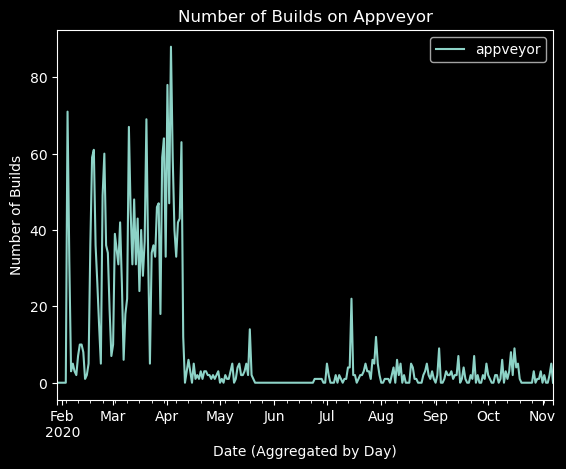

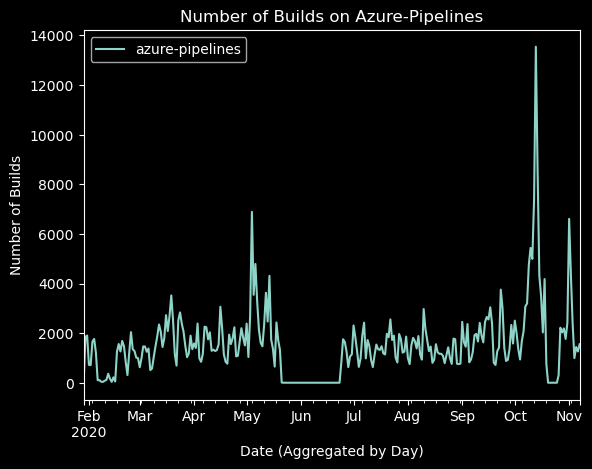

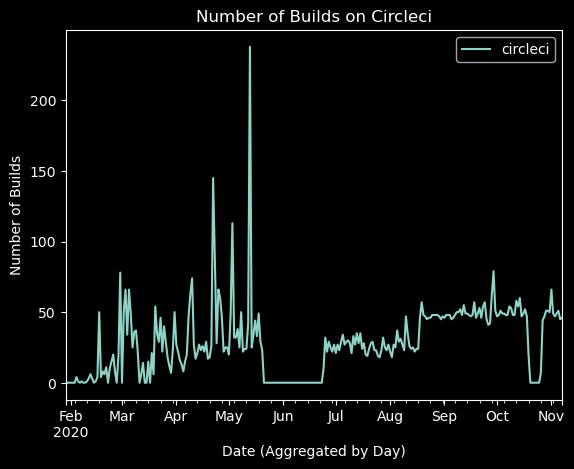

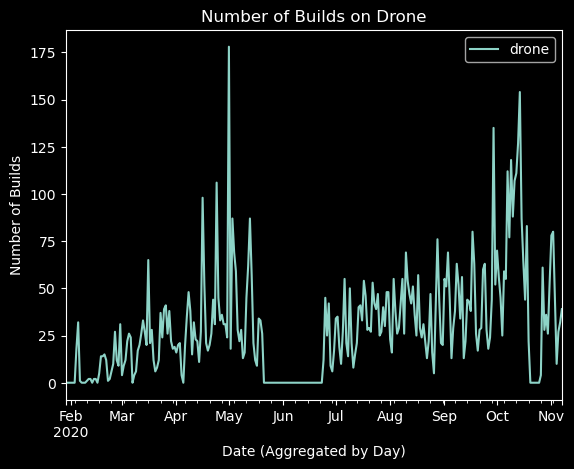

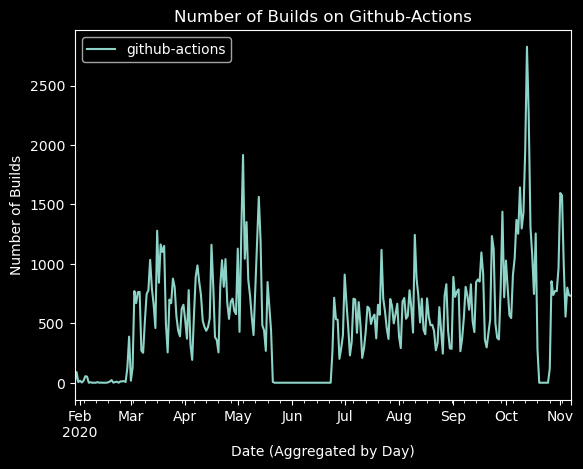

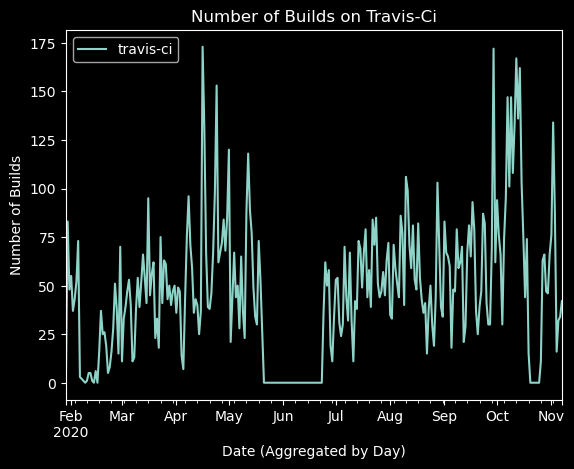

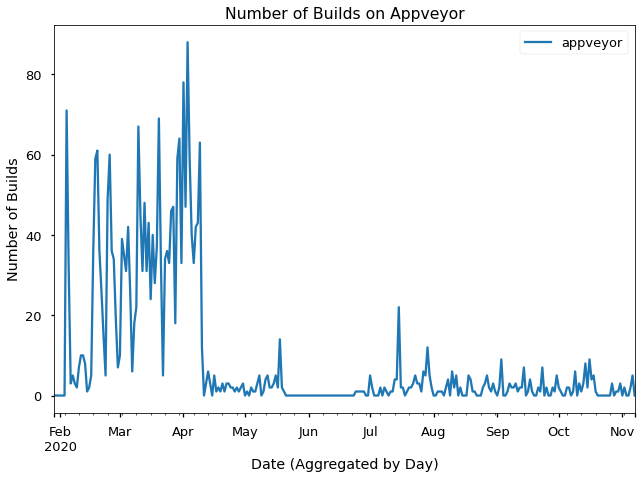

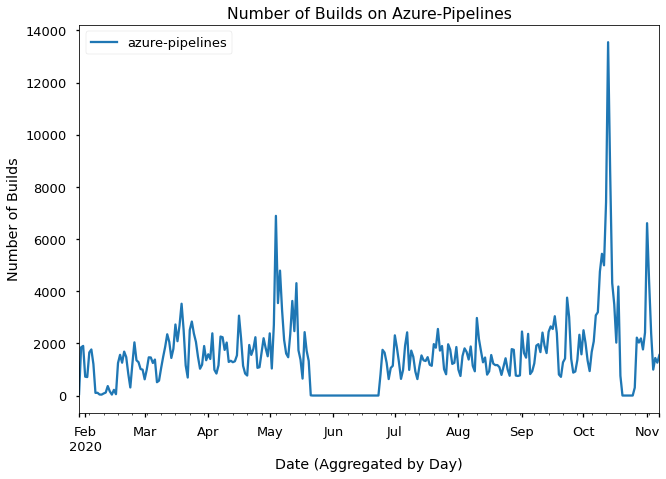

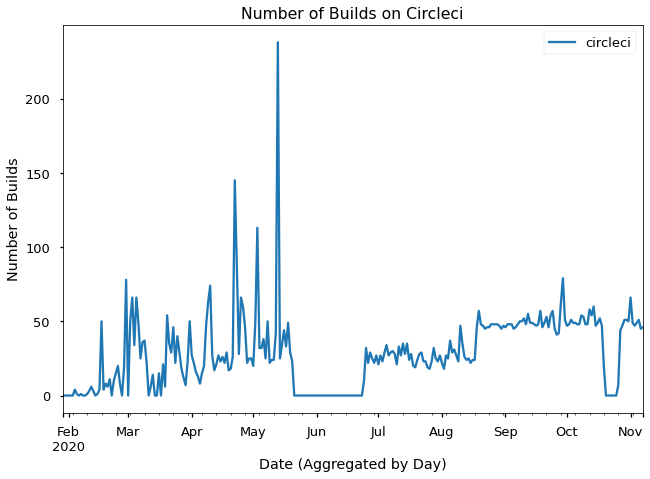

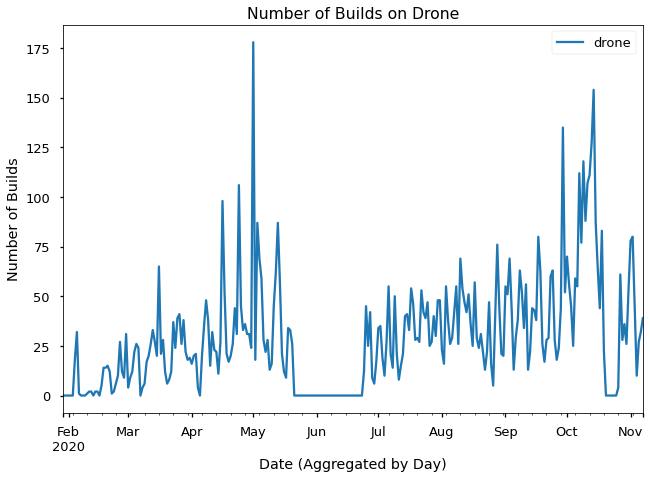

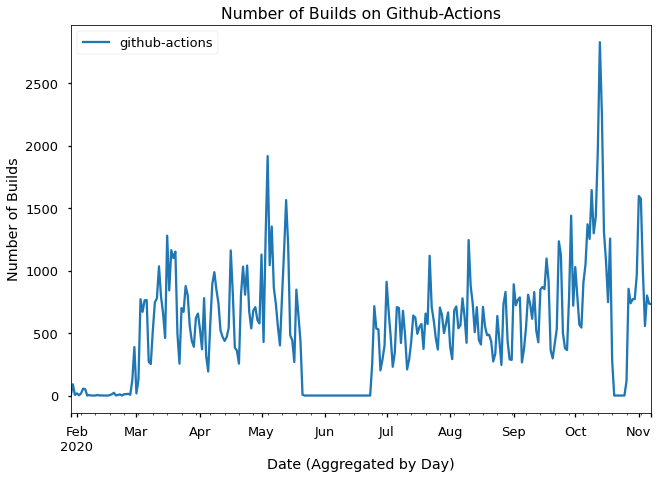

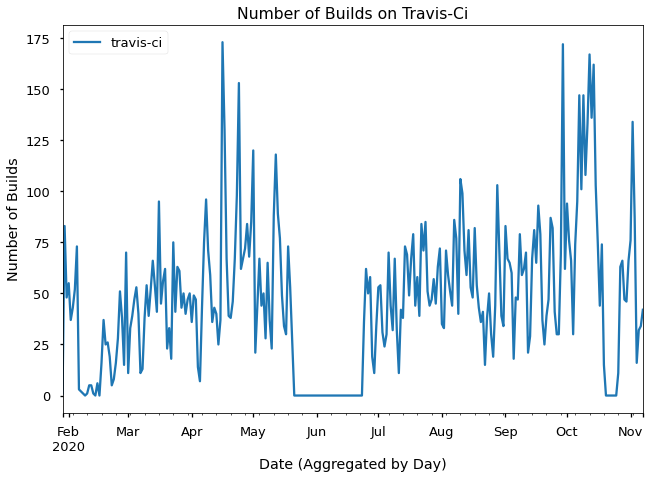

In [15]:
for context in [("dark_background", "seaborn-talk"), ("seaborn-talk", )]:
    with plt.style.context(*context):
        for k in df3.columns:
            fig, ax = plt.subplots()
            df3.plot(y=k, ax=ax)
            ax.set_title(f"Number of Builds on {k.title()}")
            ax.set_xlabel("Date (Aggregated by Day)")
            ax.set_ylabel("Number of Builds")
            fig.savefig(f"plots/builds_{k}-{'_'.join(context)}.png", bbox_inches='tight', transparent=True)
    

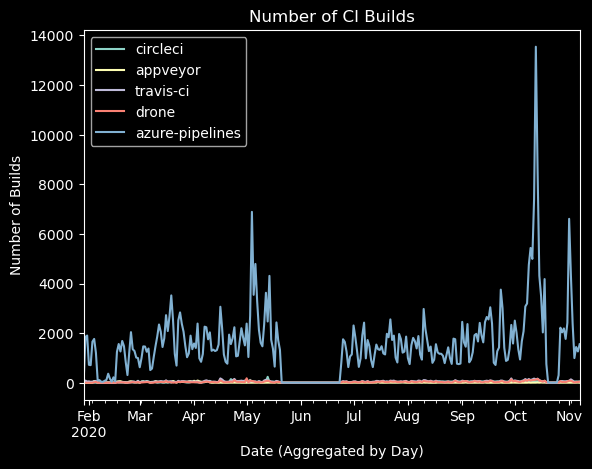

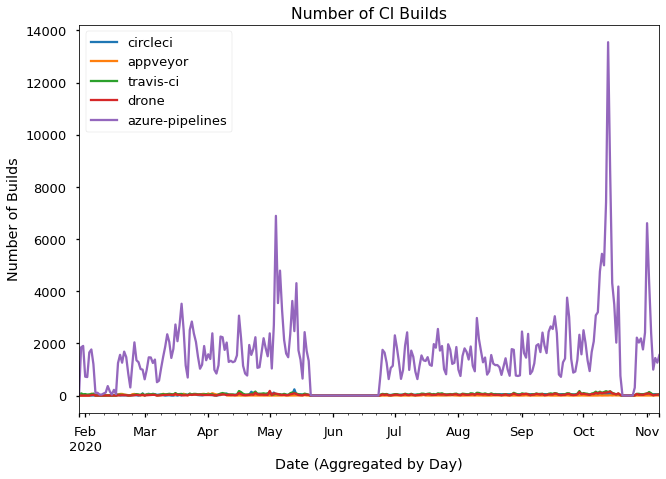

In [16]:
for context in [("dark_background", "seaborn-talk"), ("seaborn-talk", )]:
    with plt.style.context(*context):
        fig, ax = plt.subplots()
        df3.plot(y=list(set(df3.columns) - {'github-actions'}), ax=ax)
        ax.set_title(f"Number of CI Builds")
        ax.set_xlabel("Date (Aggregated by Day)")
        ax.set_ylabel("Number of Builds")
        fig.savefig(f"plots/builds_combined-{'_'.join(context)}.png", bbox_inches='tight', transparent=True)
    